In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data/raw"

In [3]:
d_train = pd.read_csv(os.path.join(data_path, "new_training_set.csv"),
                      usecols=["title_1", "image_1", "title_2", "image_2", "Label"])

In [26]:
d_test = pd.read_csv(os.path.join(data_path, "new_test_sample.csv"),
                    names=["pair_index", "title_1", "image_1", "title_2", "image_2"], skiprows=1)

In [27]:
d_train.shape

(10179, 7)

In [28]:
d_test.shape

(207, 5)

In [29]:
d_train.head()

,title_1,image_1,title_2,image_2,Label,title_1_pre,title_2_pre
0,johnson’s ® top to toe hair & body bath 500ml,fdff8b9b8229da091dd7d070aae05f81.jpg,johnson's cottontouch top to toe hair & body b...,41e191742760932598c7bd201e5dad47.jpg,0,johnson’s ® top to toe hair & body bath 500 ml,johnson's cottontouch top to toe hair & body b...
1,sandal humble,906cc44f0be72d4e767669b5b63e3a17.jpg,sandal humble glass - glanzton,7a556b836bfdd08ea592216440524a34.jpg,0,sandal humble,sandal humble glass - glanzton
2,promo likuid likuit liquit baby pod liquid sal...,475c26635de18b9f93032400732ff336.jpg,voporizer liquit - likuit - likuid - liquid pr...,ace93bec689f3f1565800c500a8341fa.jpg,0,promo likuid likuit liquit baby pod liquid sal...,voporizer liquit - likuit - likuid - liquid pr...
3,6 pasang / set anting tusuk bentuk lingkaran a...,e630997f6217555d6026547ad1c15f0b.jpg,subei 6 pasang / set anting tusuk boho bohemia...,31abbc176b09f5bd1728cfc3ecbbfb9c.jpg,0,6 pasang / set anting tusuk bentuk lingkaran a...,subei 6 pasang / set anting tusuk boho bohemia...
4,rorec natural skin care mask rorec sheet mask ...,a27d11700a7902febd039dc3a96f10f2.jpg,rorec 86 natural skin care shert mask all variant,813ad9dd638c10f1765db9dde20c9e42.jpg,1,rorec natural skin care mask rorec sheet mask ...,rorec 86 natural skin care shert mask all variant


In [30]:
d_test.head()

,pair_index,title_1,image_1,title_2,image_2
0,0,12.12 SUPER PROMO !! Sandal Jepit Pantai Fashion,83d1798fee1c90c2845204d9261169bb.jpg,Clarisse CRAZY OFFER Beli 5 Dapet 12 POLKA SUM...,caba83a8a7f9def9c4d268b6c34da7f4.jpg
1,1,Damai fashion jakarta - long dress JUMBO wanit...,126868769ca4a4694d36d28960f9de8a.jpg,[VIP] kasih fashion jakarta - long dress JUMBO...,7fdfe855a7be9c87238757c43b712b81.jpg
2,2,My Baby Minyak Telon 145 ML,86aee3dc281911f5f9d50fea17b978f0.jpg,My Baby Minyak Telon Plus 145 Ml 4btl kemasan ...,0ec544d3d4169df76ae156e76c724f0c.jpg
3,3,Creative Waterborne Marker Very Fine Double - ...,40ef98354335cf4780937da703ed6d65.jpg,SOMETHINC BROW WIZ Retractable Eyebrow,9cf798e5f940429f14b4af0fd48992a4.jpg
4,4,Goblin♛ COD Tas Ransel Anak Sekolah Karakter K...,c28512df97d0fc1d61fd30de966e01c3.jpg,TAS KARAKTER ANAK LUCU,a4c09a46d8b1adda43a2433d40bba583.jpg


In [9]:
d_train.isna().sum()

title_1    0
image_1    0
title_2    2
image_2    0
Label      0
dtype: int64

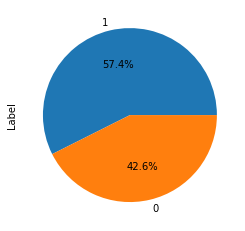

In [11]:
d_train.Label.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.savefig('../figures/label_dist.png')

In [12]:
for row in d_train.loc[d_train["Label"] == 1, ["title_1", "title_2", "Label"]].to_dict(orient='records')[:20]:
    print(row['title_1'])
    print(row['title_2'])
    print("\n")

ROREC NATURAL SKIN CARE MASK ROREC SHEET MASK MASKER WAJAH MASK SHEET MASKER TOPENG SKINCARE
Rorec 86 Natural Skin Care Shert Mask All Variant


rokok elektrik evod 1100mAh
rokok elektric evod 1100mah


HIJAB INSTAN / JILBAB SERUT JOKOWI ADIBA
JILBAB SERUT ADIBA JOKOWI POLOS (1KG=10PCS) / JILBAB INSTAN


Juice Cup Blender Mini Portable/USB Blender Juicer/Alat Pembuat Jus
Blender Juice CUP Mini Portable


BATAMGROSIR.ID | PULPEN BTS - BANGTAN BOYS - ARMY - PENA BTS - PENA BTS - PENA BT21 - PULPEN BT21
PULPEN KARAKTER BT21 / UNICORN / BANGTAN BOYS - ARMY - PENA BTS


Pompa ASI Real Bubee Double Electric Beast Pump - B10007
Pompa ASI Real Bubee Double Electric Beast Pump ~ su185


freemir Set Alat Makan Wheat Straw Tableware 4 in 1
ALAT MAKAN WHEAT STRAW TABLEWARE 4 PCS


KAOS RINGER TEE L POLOS / BAHAN TEBAL / ASLI SPANDEX SOFT / KAOS WANITA TERLARIS / TSHIRT
ZAYA - KAOS RINGER TEE POLOS


PROMO: PROFELIN Kaleng bisa utk JUNIOR & ADULT 400gr
Big Promo Profelin Wet Food Kaleng 400 Gram fo

In [13]:
for row in d_train.loc[d_train["Label"] == 0, ["title_1", "title_2", "Label"]].to_dict(orient='records')[:20]:
    print(row['title_1'])
    print(row['title_2'])
    print("\n")

Johnson’s ® Top to Toe Hair & Body Bath 500ml
Johnson's cottontouch top to toe hair & body baby bath 500 ml


Sandal Humble
Sandal Humble Glass - Glanzton


PROMO LIKUID LIKUIT LIQUIT BABY POD LIQUID SALT POD 15ML 10RASA
Voporizer Liquit - Likuit - Likuid - Liquid Premium Berry Banana Mochi 60ML 3MG - Bananalicious


6 Pasang / Set Anting Tusuk Bentuk Lingkaran Aksen Mutiara + Rumbai Gaya Bohemian untuk Wanita
Subei 6 Pasang / Set Anting Tusuk Boho Bohemia Desain Geometri Hias Kristal / Rumbai untuk Wanita


Hijab bergo 1 layer tali nonpet hijab instant diamond strecht
Khimar tali belakang


Korea 2019 Versi Korea Dari Musim Gugur Baru Sastra Retro Peas Sepatu Wanita Fila Perempuan New Year
Korea 2019 Versi Korea Dari Musim Gugur Baru Sastra Retro Peas Sepatu Wanita Fila Perempuan New Year


AlQuran Mudah Hafal A5
Al Quran AL HUFAZ A5 (biru) Al Quran Hafalan Mudah Terjemah & Tajwid Warna - Cordoba


【12.12】Ready Stok / Romper Bayi Laki-laki / Perempuan Lengan Pendek Tulisan Babi Jumper

## Need to cleansing

- lower case
- add space before|after symbol like ][
- add space after number

In [14]:
d_train.title_1 = d_train.title_1.str.lower()
d_train.title_2 = d_train.title_2.str.lower()

In [15]:
d_train.dropna(inplace=True)

In [16]:
d_train['title_1_pre'] = d_train.title_1.apply(lambda x: re.sub('(\d+)([a-zA-Z]+)', r'\1 \2', x))
d_train['title_1_pre'] = d_train.title_1_pre.apply(lambda x: re.sub('\]', r' ] ', x))
d_train['title_1_pre'] = d_train.title_1_pre.apply(lambda x: re.sub('\[', r' [ ', x))

d_train['title_2_pre'] = d_train.title_2.apply(lambda x: re.sub('(\d+)([a-zA-Z]+)', r'\1 \2', x))
d_train['title_2_pre'] = d_train.title_2_pre.apply(lambda x: re.sub('\]', r' ] ', x))
d_train['title_2_pre'] = d_train.title_2_pre.apply(lambda x: re.sub('\[', r' [ ', x))

In [31]:
d_test['title_1_pre'] = d_test.title_1.apply(lambda x: re.sub('(\d+)([a-zA-Z]+)', r'\1 \2', x))
d_test['title_1_pre'] = d_test.title_1_pre.apply(lambda x: re.sub('\]', r' ] ', x))
d_test['title_1_pre'] = d_test.title_1_pre.apply(lambda x: re.sub('\[', r' [ ', x))

d_test['title_2_pre'] = d_test.title_2.apply(lambda x: re.sub('(\d+)([a-zA-Z]+)', r'\1 \2', x))
d_test['title_2_pre'] = d_test.title_2_pre.apply(lambda x: re.sub('\]', r' ] ', x))
d_test['title_2_pre'] = d_test.title_2_pre.apply(lambda x: re.sub('\[', r' [ ', x))

In [32]:
d_train

,title_1,image_1,title_2,image_2,Label,title_1_pre,title_2_pre
0,johnson’s ® top to toe hair & body bath 500ml,fdff8b9b8229da091dd7d070aae05f81.jpg,johnson's cottontouch top to toe hair & body b...,41e191742760932598c7bd201e5dad47.jpg,0,johnson’s ® top to toe hair & body bath 500 ml,johnson's cottontouch top to toe hair & body b...
1,sandal humble,906cc44f0be72d4e767669b5b63e3a17.jpg,sandal humble glass - glanzton,7a556b836bfdd08ea592216440524a34.jpg,0,sandal humble,sandal humble glass - glanzton
2,promo likuid likuit liquit baby pod liquid sal...,475c26635de18b9f93032400732ff336.jpg,voporizer liquit - likuit - likuid - liquid pr...,ace93bec689f3f1565800c500a8341fa.jpg,0,promo likuid likuit liquit baby pod liquid sal...,voporizer liquit - likuit - likuid - liquid pr...
3,6 pasang / set anting tusuk bentuk lingkaran a...,e630997f6217555d6026547ad1c15f0b.jpg,subei 6 pasang / set anting tusuk boho bohemia...,31abbc176b09f5bd1728cfc3ecbbfb9c.jpg,0,6 pasang / set anting tusuk bentuk lingkaran a...,subei 6 pasang / set anting tusuk boho bohemia...
4,rorec natural skin care mask rorec sheet mask ...,a27d11700a7902febd039dc3a96f10f2.jpg,rorec 86 natural skin care shert mask all variant,813ad9dd638c10f1765db9dde20c9e42.jpg,1,rorec natural skin care mask rorec sheet mask ...,rorec 86 natural skin care shert mask all variant
...,...,...,...,...,...,...,...
10176,[bayar di tempat]o.two.o lipstick matte 12 war...,08f5ba211a48e9b66bbf0d0105272efb.jpg,o.two.o lipstick matte 12 warna (2 in 1),08f5ba211a48e9b66bbf0d0105272efb.jpg,1,[ bayar di tempat ] o.two.o lipstick matte 12...,o.two.o lipstick matte 12 warna (2 in 1)
10177,baso aci jeletot intans gurih khas kota garut,855daa89bf4f31cec0f40b144cdb283e.jpg,baso aci instan khas garut enak gurih..,ffad7f79772f4e482f420591848cd69e.jpg,0,baso aci jeletot intans gurih khas kota garut,baso aci instan khas garut enak gurih..
10178,minyak kutus kutus asli bali,9525365b5b15af5855abf9daf03da8b4.jpg,minyak kutus kutus tamba waras 100ml,7098a9638b9ad66fb8a7912201ec3d82.jpg,1,minyak kutus kutus asli bali,minyak kutus kutus tamba waras 100 ml
10179,[1kg 13pcs] ❤ minimamy ❤ baju jumper pendek ka...,a245f49fdc9a03655d98e6a22a89cb7d.jpg,[1kg 13pcs] ❤ kiddikiddo❤ baju jumper kaos pen...,ea3e2af55a4ebcdb61bfb9f5da56d1bb.jpg,0,[ 1 kg 13 pcs ] ❤ minimamy ❤ baju jumper pen...,[ 1 kg 13 pcs ] ❤ kiddikiddo❤ baju jumper ka...


In [33]:
d_test.head()

,pair_index,title_1,image_1,title_2,image_2,title_1_pre,title_2_pre
0,0,12.12 SUPER PROMO !! Sandal Jepit Pantai Fashion,83d1798fee1c90c2845204d9261169bb.jpg,Clarisse CRAZY OFFER Beli 5 Dapet 12 POLKA SUM...,caba83a8a7f9def9c4d268b6c34da7f4.jpg,12.12 SUPER PROMO !! Sandal Jepit Pantai Fashion,Clarisse CRAZY OFFER Beli 5 Dapet 12 POLKA SUM...
1,1,Damai fashion jakarta - long dress JUMBO wanit...,126868769ca4a4694d36d28960f9de8a.jpg,[VIP] kasih fashion jakarta - long dress JUMBO...,7fdfe855a7be9c87238757c43b712b81.jpg,Damai fashion jakarta - long dress JUMBO wanit...,[ VIP ] kasih fashion jakarta - long dress J...
2,2,My Baby Minyak Telon 145 ML,86aee3dc281911f5f9d50fea17b978f0.jpg,My Baby Minyak Telon Plus 145 Ml 4btl kemasan ...,0ec544d3d4169df76ae156e76c724f0c.jpg,My Baby Minyak Telon 145 ML,My Baby Minyak Telon Plus 145 Ml 4 btl kemasan...
3,3,Creative Waterborne Marker Very Fine Double - ...,40ef98354335cf4780937da703ed6d65.jpg,SOMETHINC BROW WIZ Retractable Eyebrow,9cf798e5f940429f14b4af0fd48992a4.jpg,Creative Waterborne Marker Very Fine Double - ...,SOMETHINC BROW WIZ Retractable Eyebrow
4,4,Goblin♛ COD Tas Ransel Anak Sekolah Karakter K...,c28512df97d0fc1d61fd30de966e01c3.jpg,TAS KARAKTER ANAK LUCU,a4c09a46d8b1adda43a2433d40bba583.jpg,Goblin♛ COD Tas Ransel Anak Sekolah Karakter K...,TAS KARAKTER ANAK LUCU


In [34]:
d_train.to_csv("../data/text_clean/train.csv", index=False)
d_test.to_csv("../data/text_clean/test.csv", index=False)

## Overlapping

In [ ]:
d_train['title_1_unique'] = d_train.title_1_pre.apply(lambda x: list(set(x.split())))
d_train['title_2_unique'] = d_train.title_2_pre.apply(lambda x: list(set(x.split())))

In [ ]:
d_train['vocab'] = d_train.title_1_unique + d_train.title_2_unique

In [ ]:
d_train['vocab'] = d_train.vocab.apply(lambda x: list(set(x)))

In [ ]:
d_train['num_vocab'] = d_train.vocab.apply(lambda x: len(x))

In [ ]:
def word_overlap(row):
    t1 = set(row['title_1_unique'])
    t2 = set(row['title_2_unique'])
    
    num_intersec = len(t1.intersection(t2))
    return num_intersec

In [ ]:
d_train['num_overlap'] = d_train.apply(word_overlap, axis = 1)

In [ ]:
d_train['percent_overlap'] = (d_train.num_overlap / d_train.num_vocab) * 100

In [ ]:
plt.figure(figsize=(3,5))
sns.boxplot(x = 'Label', y='percent_overlap', data = d_train)
plt.savefig("../figures/word_overlap_boxplot.png")

In [ ]:
d_train.loc[d_train['Label'] == 1, 'percent_overlap'].mean()

In [ ]:
d_train.loc[d_train['Label'] == 0, 'percent_overlap'].mean()